# Cardiovascular Disease


In [1]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [8]:
cardio = pd.read_csv('cleaned_cardiovascular_data.csv',sep=",")


In [9]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active,cardio
0,50.0,0,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,0,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
#inputs
inputs = cardio.drop(columns=['cardio'])
inputs.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol,active
0,50.0,0,168,62.0,110,80,1,1,0,0,1
1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,48.0,0,169,82.0,150,100,1,1,0,0,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [11]:
#outputs
output = cardio['cardio']
output.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

### Splitting dataset into train and test 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.25)

In [20]:
x_train = pd.DataFrame(x_train)
x_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
69247,62.0,1,167,86.0,130,70,1,1,0,0,0
15899,62.0,1,165,66.0,145,90,1,1,0,0,1
5230,62.0,0,172,86.0,130,90,2,1,1,0,1
63163,48.0,1,164,80.0,130,90,3,1,0,0,1
30021,51.0,1,167,59.0,120,70,3,3,0,0,1


### Removing indexes for train and test datasets, and converting it into a sequential order 

In [21]:
# writing to Excel
datatoexcel = pd.ExcelWriter('xtrain1.xlsx')
  
# write DataFrame to excel
x_train.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

C:\Users\ryanc\AppData\Local\Temp\ipykernel_5920\2291824756.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  datatoexcel.save()


DataFrame is written to Excel File successfully.


In [22]:
train1 = pd.read_excel('xtrain1.xlsx')
x_train1 = train1.drop(columns=['Unnamed: 0'])

x_train1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62,1,167,86.0,130,70,1,1,0,0,0
1,62,1,165,66.0,145,90,1,1,0,0,1
2,62,0,172,86.0,130,90,2,1,1,0,1
3,48,1,164,80.0,130,90,3,1,0,0,1
4,51,1,167,59.0,120,70,3,3,0,0,1


In [23]:
# writing to Excel
datatoexcel2 = pd.ExcelWriter('xtest1.xlsx')
  
# write DataFrame to excel
x_test.to_excel(datatoexcel2)
  
# save the excel
datatoexcel2.save()
print('DataFrame is written to Excel File successfully.')

C:\Users\ryanc\AppData\Local\Temp\ipykernel_5920\1559829482.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  datatoexcel2.save()


DataFrame is written to Excel File successfully.


In [24]:
test1 = pd.read_excel('xtest1.xlsx')
x_test1 = test1.drop(columns=['Unnamed: 0'])

x_test1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,59,0,184,90.0,130,80,3,2,1,0,1
1,40,0,180,70.0,110,80,1,1,0,0,1
2,45,1,168,68.0,120,80,1,1,0,0,1
3,58,0,171,77.0,120,80,1,1,0,0,1
4,50,1,152,64.0,130,80,1,1,0,0,0


In [25]:
# writing to Excel
datatoexcel3 = pd.ExcelWriter('ytrain1.xlsx')
  
# write DataFrame to excel
y_train.to_excel(datatoexcel3)
  
# save the excel
datatoexcel3.save()
print('DataFrame is written to Excel File successfully.')

C:\Users\ryanc\AppData\Local\Temp\ipykernel_5920\944968317.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  datatoexcel3.save()


DataFrame is written to Excel File successfully.


In [26]:
ytrain1 = pd.read_excel('ytrain1.xlsx')
y_train1 = ytrain1.drop(columns=['Unnamed: 0'])

y_train1.head()

,cardio
0,1
1,1
2,0
3,1
4,1


### Checking balance of cardiovascular disease for train dataset 

In [27]:
y_traindf = y_train1.value_counts()

y_traindf.head()

cardio
0         25154
1         24490
dtype: int64

In [28]:
# writing to Excel
#datatoexcel4 = pd.ExcelWriter('ytest1.xlsx')
  
# write DataFrame to excel
y_test.to_excel('ytest1.xlsx', sheet_name="Sheet_1")
  
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


### Checking cardiovascular test dataset 

In [29]:
ytest1 = pd.read_excel('ytest1.xlsx')
y_test1 = ytest1.drop(columns=['Unnamed: 0'])

y_test1.head()

,cardio
0,0
1,0
2,0
3,0
4,0


### Checking balance of cardiovascular disease for train dataset 

In [30]:
y_testdf = y_test1.value_counts()

y_testdf.head()

cardio
0         8413
1         8136
dtype: int64

### Using Keras to define a Neural network that will be trained off of the test dataset. This Neural Network can then be used to predict future values for cardiovascular disease.



In [31]:
#https://www.youtube.com/watch?v=_VTtrSDHPwU&list=PLQY2H8rRoyvyK5aEDAI3wUUqC_F0oEroL&index=15

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 25, activation = 'softsign', input_dim = 11))
classifier.add(Dense(units = 5, activation = 'softsign'))
classifier.add(Dense(units = 3, activation = 'softsign'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                300       
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


### Once the Neural Network is defined, now I will specify is the optimizer and loss function



In [32]:
from sklearn import metrics   # Allows us to view accuracy and other such values
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
classifier.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\ryanc\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Now the neural network will train using Classifier.fit, passing it the training data. The NN will then spot the patterns in the data, and build a neural network that could replicate that. It will do it a 100 times.



In [33]:
history = classifier.fit(x_train1, y_train1, batch_size = 1, epochs = 100,  validation_data=(x_test1, y_test1))


Epoch 1/100
49644/49644 [==============================] - 95s 2ms/step - loss: 0.6156 - accuracy: 0.6710 - val_loss: 0.5914 - val_accuracy: 0.6970
Epoch 2/100
49644/49644 [==============================] - 114s 2ms/step - loss: 0.5992 - accuracy: 0.6886 - val_loss: 0.6039 - val_accuracy: 0.6872
Epoch 3/100
49644/49644 [==============================] - 110s 2ms/step - loss: 0.5945 - accuracy: 0.6919 - val_loss: 0.5860 - val_accuracy: 0.7034
Epoch 4/100
49644/49644 [==============================] - 121s 2ms/step - loss: 0.5919 - accuracy: 0.6947 - val_loss: 0.5825 - val_accuracy: 0.7034
Epoch 5/100
49644/49644 [==============================] - 121s 2ms/step - loss: 0.5900 - accuracy: 0.6969 - val_loss: 0.5831 - val_accuracy: 0.7040
Epoch 6/100
49644/49644 [==============================] - 125s 3ms/step - loss: 0.5868 - accuracy: 0.7001 - val_loss: 0.5789 - val_accuracy: 0.7055
Epoch 7/100
49644/49644 [==============================] - 128s 3ms/step - loss: 0.5854 - accuracy: 0.6999 

Epoch 56/100
49644/49644 [==============================] - 110s 2ms/step - loss: 0.5751 - accuracy: 0.7084 - val_loss: 0.5715 - val_accuracy: 0.7118
Epoch 57/100
49644/49644 [==============================] - 97s 2ms/step - loss: 0.5771 - accuracy: 0.7076 - val_loss: 0.5694 - val_accuracy: 0.7133
Epoch 58/100
49644/49644 [==============================] - 97s 2ms/step - loss: 0.5757 - accuracy: 0.7087 - val_loss: 0.5772 - val_accuracy: 0.7082
Epoch 59/100
49644/49644 [==============================] - 97s 2ms/step - loss: 0.5759 - accuracy: 0.7068 - val_loss: 0.5752 - val_accuracy: 0.7079
Epoch 60/100
49644/49644 [==============================] - 95s 2ms/step - loss: 0.5752 - accuracy: 0.7087 - val_loss: 0.5768 - val_accuracy: 0.7107
Epoch 61/100
49644/49644 [==============================] - 93s 2ms/step - loss: 0.5750 - accuracy: 0.7090 - val_loss: 0.5752 - val_accuracy: 0.7114
Epoch 62/100
49644/49644 [==============================] - 114s 2ms/step - loss: 0.5767 - accuracy: 0.70

Model Accuracy

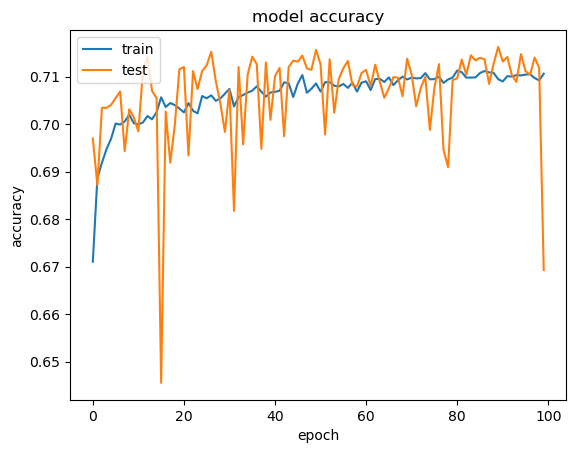

In [34]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model loss

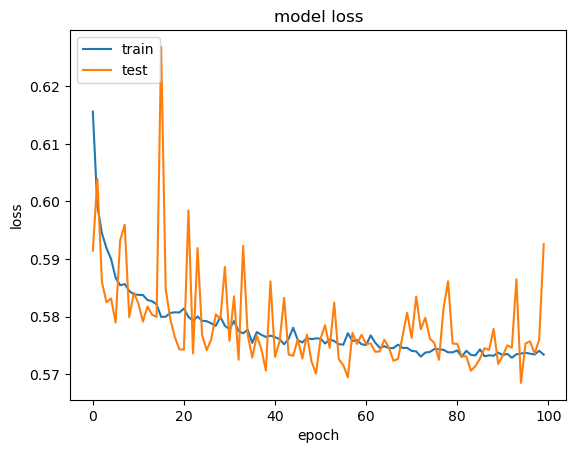

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing the prediction by slotting in test dataset to determine accuracy of model

In [42]:
prediction = classifier.predict(x_test1) > 0.5
prediction = (prediction > 0.5) * 1
accuracy_nn = round(metrics.accuracy_score(y_test1, prediction) * 100, 4)

#accuracy_nn = round(metrics.accuracy_score(y_test1, prediction) * 100, 2)
print("The accuracy of the graph is " + str(accuracy_nn))

518/518 [==============================] - 1s 1ms/step
The accuracy of the graph is 66.9285


### Checking how well the model fit visually 

518/518 [==============================] - 1s 1ms/step


C:\Users\ryanc\AppData\Local\Temp\ipykernel_5920\2779596355.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(resdf["Probability"],  color="red")


<AxesSubplot: xlabel='Probability', ylabel='Density'>

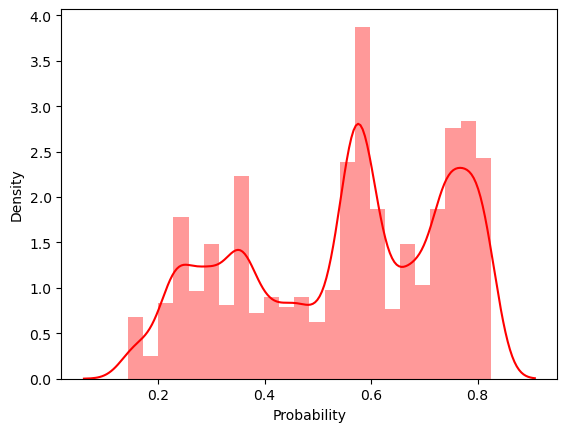

In [38]:
#PROBABILITY DENSITY ESTIMATION

#https://machinelearningmastery.com/probability-density-estimation/

res=classifier.predict(x_test1)
resdf=pd.DataFrame(res, index=x_test1.index)
resdf.columns=["Probability"]
resdf["ID"]=range(16549)
resdf["y"]=np.where(resdf["Probability"]>=0.5,"1", "0")
sb.distplot(resdf["Probability"],  color="red")

### Predicting a Single Case

In [39]:
day= 3 # day of bith 
month= 4 # month of bith (in numbers)
year= 2001 # year of bith

gender1= 1 # 0 for women, 1 for men
height1= 175 # in cm
weight1= 65 # in kilograms
ap_hi1= 110 # Systolic blood pressure
ap_lo1= 75 # Diastolic blood pressure
cholesterol1= 1 # 1: normal, 2: above normal, 3: well above normal
gluc1= 1 # 1: normal, 2: above normal, 3: well above normal
smoke1= 0 # 1 if you smoke, 0 if not
alco1= 0 # 1 if you drink alcohol, 0 if not
active1= 1 # 1 if you do physical activity, 0 if not


In [40]:
#current age in days

from datetime import date

date_f= date(year, month, day)
date_i = date.today()
age = int((date_i - date_f).days/365)

single = np.array([age, gender1, height1, weight1, ap_hi1, ap_lo1, cholesterol1, gluc1, 
                   smoke1, alco1, active1])

single1 = pd.DataFrame(single)
final = single1.transpose()
final.head()

,0,1,2,3,4,5,6,7,8,9,10
0,22,1,175,65,110,75,1,1,0,0,1


In [41]:
finalres=classifier.predict(final)

print("The probability of having a Cardiovascular Disease is: "+ str(round(finalres[0,0]*100,2)) + "%")

1/1 [==============================] - 0s 80ms/step
The probability of having a Cardiovascular Disease is: 14.39%
